In [22]:
import os
import subprocess
import pandas as pd
import io
import matplotlib.pyplot as plt
import json

In [74]:
def runDbscan(dfData, n, r):
    inputText = dfData.to_csv(header=None, sep=' ', index=False)
    cmd = '../bin/b_boehm'
    result = subprocess.run(
        [ cmd, '--', f'{n}', f'{r}' ],
        input=inputText,
        stdout=subprocess.PIPE, universal_newlines=True, check=True
    )
    dct = json.loads(result.stdout)
    return pd.DataFrame(dct['output'])

t = pd.read_csv('../sample_data/data.dat', sep=' ', header=None, names=['x', 'y'])
#t.to_csv(header=None, sep=' ', index=False)

In [111]:
df = runDbscan(t, 50, 0.4)

In [112]:
clusters = df.groupby('cluster_id')

[]

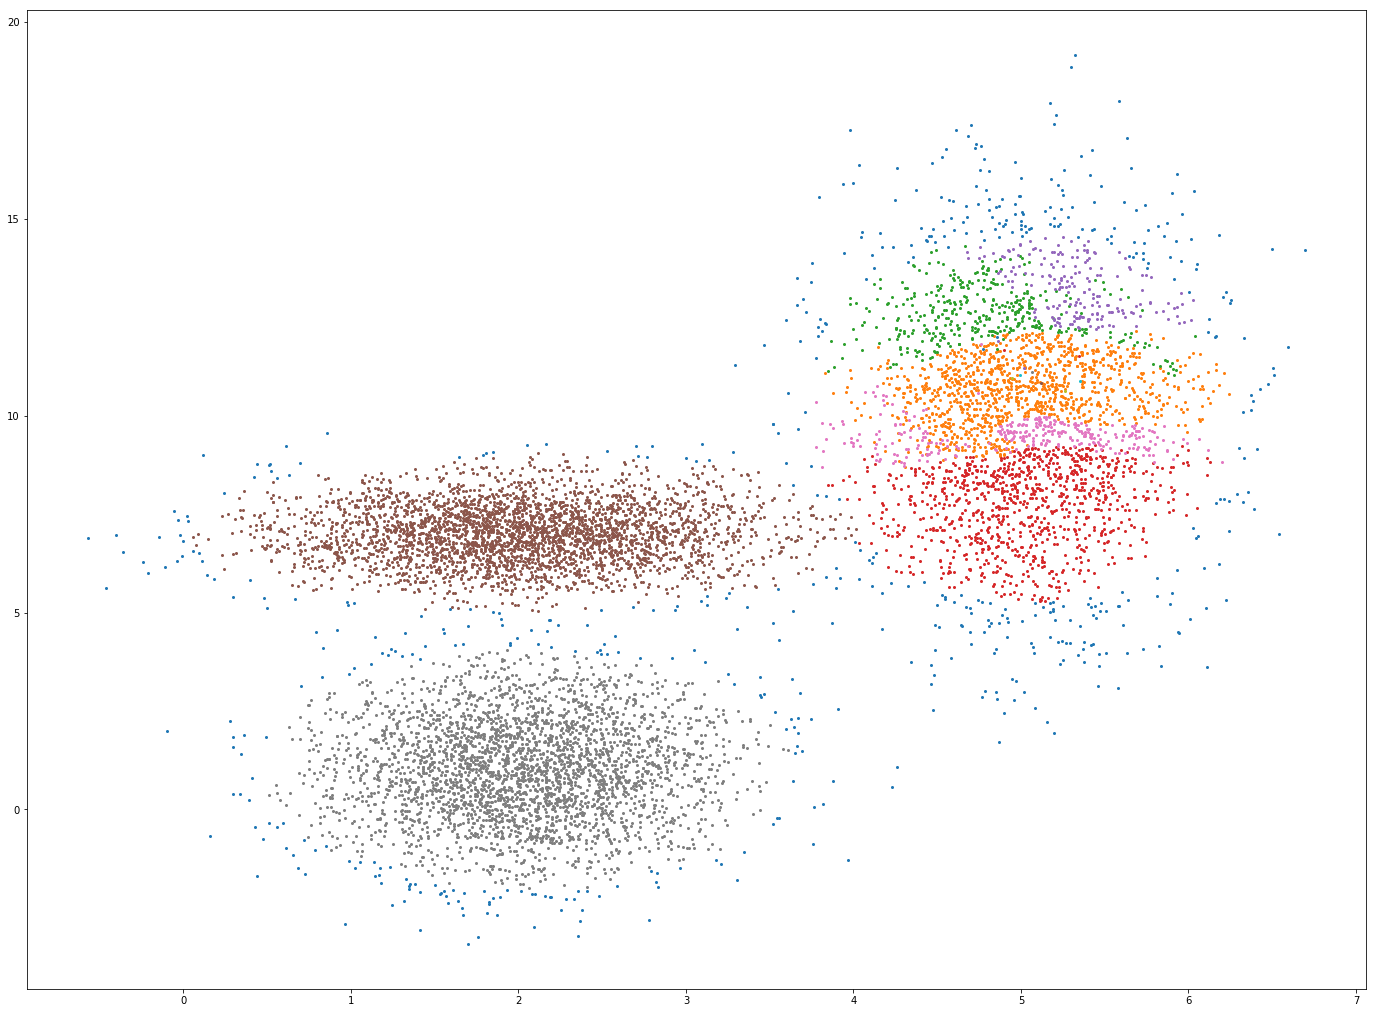

In [113]:
plt.figure(figsize=(24,18))
for clusterId, grp in clusters:
    plt.scatter(grp['x'], grp['y'], s=4)
plt.plot()

In [114]:
set(df['cluster_id'])

{0,
 1,
 4,
 5,
 6,
 7,
 9,
 12,
 625,
 4905,
 5440,
 5741,
 6390,
 6570,
 6812,
 6863,
 7050,
 7076,
 7109,
 7238,
 7311,
 7372,
 8671,
 8755,
 8956}

In [73]:
df[df['cluster_id']>10000]

,cluster_id,is_core,x,y
4351,16777216,1,4.58458,10.94585
